In [1]:
#insert an import statement that will emulate python3 behavior if run under python 2.x
from __future__ import print_function, division 

#import packages that we'll use often.
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from astropy.io import ascii
from astropy.table import Table

#set some sensible defaults for figures
matplotlib.rc('figure', figsize = (12.0, 12.0), dpi = 300 )
matplotlib.rc('xtick', labelsize=13) 
matplotlib.rc('ytick', labelsize=13) 
matplotlib.rc('axes', labelsize=15) 

#this 'magic' matplotlib command tells iPython to show any figures in this notebook, 
#rather than a separate window or saving them in separate files.
%matplotlib inline

In [421]:
#define constants; choose dt dx so that r = 1
dt = 0.01
dx = 0.02
length = 10
w = 4*np.pi
c = 1
r = (c*dt)/dx
imax = round(length/dx)
endTime = 4000
finalData = np.zeros((imax+1, endTime))  #(rows, columns)

def findEndPosition(t):
    pos = np.sin(t*w)
    return pos

def writeToFile(y, time, n):
    finalData[0][n] = time
    for i in range(1, len(y)+1):
        finalData[i][n] = y[i-1]

#initialize arrays
yn = np.zeros(imax)
yn_1 = np.zeros(imax)

#run through times
for n in range(0, endTime):
    ynew = np.zeros(imax)
    ynew[0] = findEndPosition(dt*n)
    
    #run through positions
    for i in range(1, imax-1):
        ynew[i] = 2*(1-pow(r, 2))*yn[i] - yn_1[i] + pow(r, 2)*(yn[i+1] + yn[i-1])
    
    #write data to file
    writeToFile(ynew, dt*n, n)
            
    #shift arrays yn, yn-1, ynew
    yn_1 = np.copy(yn)
    yn = np.copy(ynew)
    
#0th row of finalData is the actual time for each column
#finalData[1:, n] will give an array of positions at time n
#finalData[1, :] will give position of 1st point for all times

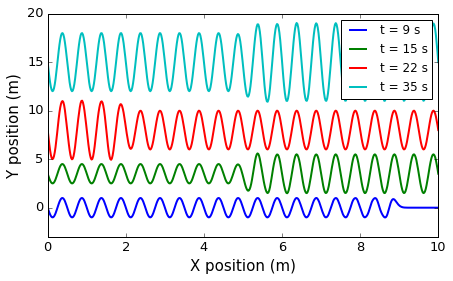

In [422]:
x = np.linspace(0, length, imax)
plt.plot(x, finalData[1:, 900], label = "String Profile at time: "+str(finalData[0, 200])+" seconds", linewidth = 2)
plt.plot(x, finalData[1:, 1500]+3.5, label = "String Profile at time: "+str(finalData[0, 200])+" seconds", linewidth = 2)
plt.plot(x, finalData[1:, 2200]+8, label = "String Profile at time: "+str(finalData[0, 200])+" seconds", linewidth = 2)
plt.plot(x, finalData[1:, 3500]+15, label = "String Profile at time: "+str(finalData[0, 200])+" seconds", linewidth = 2)
plt.ylim(-3, 20)
plt.legend(["t = 9 s", "t = 15 s", "t = 22 s", "t = 35 s"], loc = 1)
plt.xlabel("X position (m)")
plt.ylabel("Y position (m)")
fig = plt.gcf()
fig.set_size_inches(7, 4)

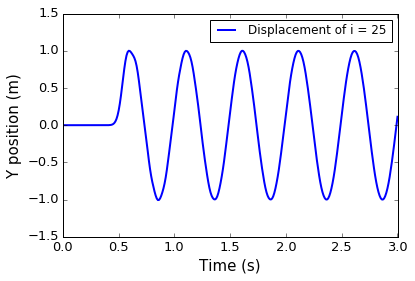

In [423]:
x = np.linspace(0, 300*dt, 300)
plt.plot(x, finalData[25, :300], label = "Displacement of i = 25", linewidth = 2)
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Y position (m)")

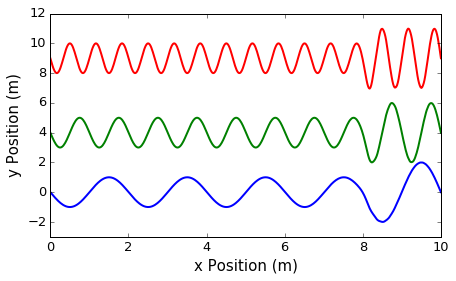

In [420]:
x = np.linspace(0, length, imax)
plt.plot(x, finalData[1:, 800], label = "n = 5", linewidth = 2)
plt.plot(x, finalData1[1:, 800]+4, label = "n = 10", linewidth = 2)
plt.plot(x, finalData2[1:, 800]+9, label = "n = 15", linewidth = 2)

plt.ylabel("y Position (m)")
plt.xlabel("x Position (m)")
plt.ylim(-3, 12)
fig = plt.gcf()
fig.set_size_inches(7, 4)